# DataFrame
### DataFrame 이란?
- 관계형 데이터베이스의 테이블과 R과 파이썬(판다스)의 데이터 프레임과 같은 개념
- 테이블의 데이터를 로우와 컬럼으로 단순하게 표현 함
- DataFrame API는 칼럼 이름과 타입이 지정된 테이블 형식의 분산 정형 데이터를 쉽게 다룰 수 있음

### RDD의 한계
1. RDD 에는 내장된 최적화 엔진이 없음
2. RDD 는 구조화된 데이터를 처리 할 수 없음

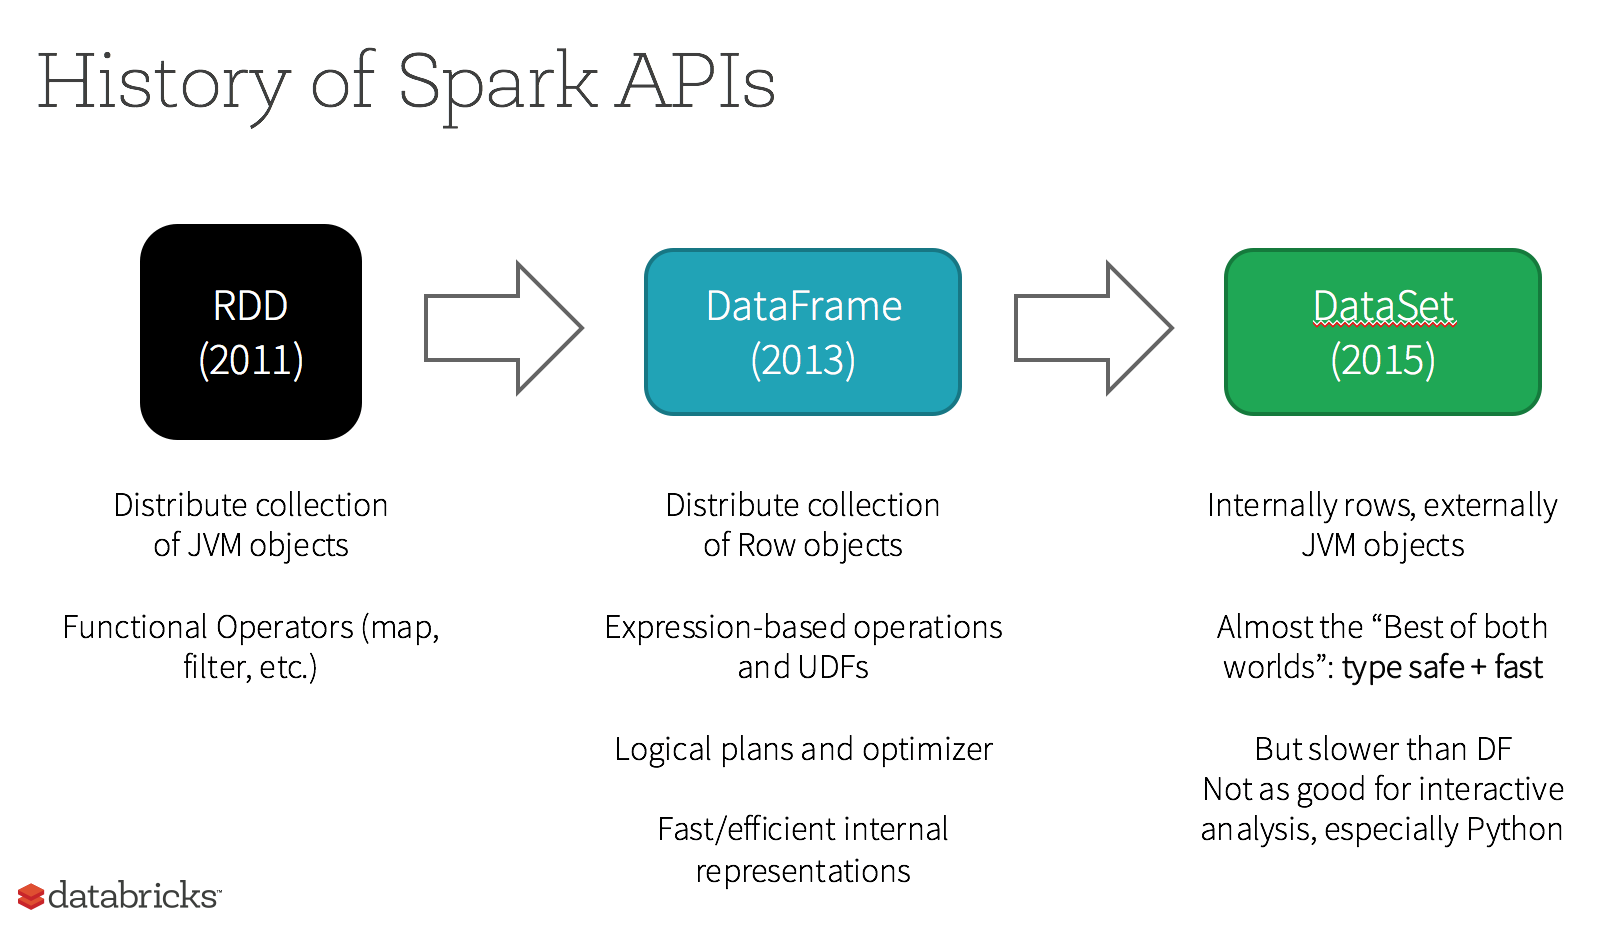

### 5.1.1  RDD에서 DataFrame 생성 
- 데이터를 먼저 RDD로 로드한 후 DataFrame으로 변환하는 방법을 가장 많이 사용한다. <p>
1) ROW의 데이터를 튜플 형태로 저장한 RDD를 사용하는 방법   => 간단하지만 스키마 지정을 할 수 없음 <p>
2) 케이스 클래스를 사용하는 방법 <p>
3) 스키마를 명시적으로 지정하는 방법 => 가장 많이 사용함

#### 5.1.1.1 SparkSession 생성
- 데이터프레임을 생성하기 위해서는 SparkContext 대신에 SaprkSession을 사용함
- HiveContext, SQLContext, StreamingContext, SparkContext와 같은 다양한 SparkContext는 SparkSession으로 모두 통합
- SparkSession은 인스턴스 생성을 위한 build() 메서드를 제공하고, 이 메서드를 이용하면 기존 인스턴스를 재사용하거나 새로운 인스턴스를 생성할 수 있음
- 만약 스파크셸을 사용하다면 스파크 셸이 자동으로 spark라는 이름으로 SparkSession 인스턴스를 생성해주므로 별도의 생성 단계를 거치지 않고 spark라는 변수를 통해 접근할 수 있음




In [136]:
// sparkSession 객체 생성 및 기본 세팅 
import org.apache.spark.sql.SparkSession
val spark = SparkSession.builder().getOrCreate()
import spark.implicits._  // RDD를 DataFrame으로 자동 변환 하는데 필요한 scala 메소드들을 제공

import org.apache.spark.sql.SparkSession
spark: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@5139375e
import spark.implicits._


#### 5.1.1.2 데이터셋 로드 
- terminal에 'git clone https://github.com/gilbutITbook/006908.git' 입력
- 예제에 사용할 파일은 italianPosts.csv이다. 이탈리아어와 관련 stack Exchange 데이터로 구성되며 각 필드는 물결 문자(~)로 구분함
- 필드 상세<br>
• commentCount: 이 포스트에 달린 댓글 개수 <br>
• lastActivityDate: 마지막 수정 날짜 및 시각 <br>
• ownerUserId: 포스트를 게시한 사용자 ID <br>
• body: 질문 및 답변 내용 <br>
• score: ‘좋아요’와 ‘싫어요’ 개수로 계산한 총 점수 <br>
• creationDate: 생성 날짜 및 시각 <br>
• viewCount: 조회 수 <br>
• title: 질문 제목 <br>
• tags: 질문에 달린 태그들 <br>
• answerCount: 질문에 달린 답변 개수 <br>
• acceptedAnswerId: 답변이 채택된 경우 채택된 답변의 ID <br>
• postTypeId: 이 포스트의 유형. 1: 질문, 2: 답변 <br>
• id: 이 포스트의 고유 ID

In [137]:
// 데이터 파싱 & RDD로 로드
val itPostsRows = sc.textFile("006908/ch05/italianPosts.csv")
itPostsRows.collect()

itPostsRows: org.apache.spark.rdd.RDD[String] = 006908/ch05/italianPosts.csv MapPartitionsRDD[265] at textFile at <console>:75
res86: Array[String] = Array(4~2013-11-11 18:21:10.903~17~&lt;p&gt;The infinitive tense is commonly used for expressing rules especially in signs (of any kind, not just road signs).&lt;/p&gt;&lt;p&gt;For instance&lt;/p&gt;&lt;blockquote&gt;  &lt;p&gt;Non fumare&lt;br&gt;  Non calpestare il prato&lt;br&gt;  Tenere la destra&lt;/p&gt;&lt;/blockquote&gt;&lt;p&gt;The language &quot;trick&quot; behind this use of the infinitive form is the omission of the clause &lt;em&gt;Si prega di&lt;/em&gt; or equivalent, so the above sentences are read as&lt;/p&gt;&lt;blockquote&gt;  &lt;p&gt;&lt;em&gt;&lt;strong&gt;Si prega di&lt;/em&gt;&lt;/strong&gt; non fumare&lt;br&gt;  &lt...


In [138]:
val itPostsSplit = itPostsRows.map(x => x.split("~"))
// 각 필드는 '~'로 구분되기 때문
itPostsSplit.collect()

itPostsSplit: org.apache.spark.rdd.RDD[Array[String]] = MapPartitionsRDD[266] at map at <console>:75
res87: Array[Array[String]] = Array(Array(4, 2013-11-11 18:21:10.903, 17, &lt;p&gt;The infinitive tense is commonly used for expressing rules especially in signs (of any kind, not just road signs).&lt;/p&gt;&lt;p&gt;For instance&lt;/p&gt;&lt;blockquote&gt;  &lt;p&gt;Non fumare&lt;br&gt;  Non calpestare il prato&lt;br&gt;  Tenere la destra&lt;/p&gt;&lt;/blockquote&gt;&lt;p&gt;The language &quot;trick&quot; behind this use of the infinitive form is the omission of the clause &lt;em&gt;Si prega di&lt;/em&gt; or equivalent, so the above sentences are read as&lt;/p&gt;&lt;blockquote&gt;  &lt;p&gt;&lt;em&gt;&lt;strong&gt;Si prega di&lt;/em&gt;&lt;/strong&gt; non fumare&lt;br&gt;  &lt;strong&gt...


In [139]:
val df = itPostsSplit.toDF()
println(df.printSchema)
// 문자열 배열 타입의 단일 칼럼을 가진 DataFrame을 얻을 수 있지만 이걸 사용할 수 없기 때문에 변환이 필요.

root
 |-- value: array (nullable = true)
 |    |-- element: string (containsNull = true)

()


df: org.apache.spark.sql.DataFrame = [value: array<string>]


#### 5.1.1.3 튜플 형식의 RDD에서 DataFrame 생성 


In [140]:
// RDD의 배열을 튜플로 변환하고 toDF를 호출해서 DataFrame 생성
val itPostsRDD = itPostsSplit.map(x => (x(0),x(1),x(2),x(3),x(4),x(5),x(6),x(7),x(8),x(9),x(10),x(11),x(12))) // 번거로움
val itPostsDFrame = itPostsRDD.toDF()

itPostsRDD: org.apache.spark.rdd.RDD[(String, String, String, String, String, String, String, String, String, String, String, String, String)] = MapPartitionsRDD[267] at map at <console>:76
itPostsDFrame: org.apache.spark.sql.DataFrame = [_1: string, _2: string ... 11 more fields]


In [141]:
itPostsDFrame.collect()

res89: Array[org.apache.spark.sql.Row] = Array([4,2013-11-11 18:21:10.903,17,&lt;p&gt;The infinitive tense is commonly used for expressing rules especially in signs (of any kind, not just road signs).&lt;/p&gt;&lt;p&gt;For instance&lt;/p&gt;&lt;blockquote&gt;  &lt;p&gt;Non fumare&lt;br&gt;  Non calpestare il prato&lt;br&gt;  Tenere la destra&lt;/p&gt;&lt;/blockquote&gt;&lt;p&gt;The language &quot;trick&quot; behind this use of the infinitive form is the omission of the clause &lt;em&gt;Si prega di&lt;/em&gt; or equivalent, so the above sentences are read as&lt;/p&gt;&lt;blockquote&gt;  &lt;p&gt;&lt;em&gt;&lt;strong&gt;Si prega di&lt;/em&gt;&lt;/strong&gt; non fumare&lt;br&gt;  &lt;strong&gt;&lt;em&gt;Si prega di&lt;/em&gt;&lt;/strong&gt; non calpestare il prato&lt;br&gt;  &lt;strong&gt;...


In [144]:
itPostsDFrame.show(10)

+---+--------------------+---+--------------------+---+--------------------+----+--------------------+--------------------+----+----+---+----+
| _1|                  _2| _3|                  _4| _5|                  _6|  _7|                  _8|                  _9| _10| _11|_12| _13|
+---+--------------------+---+--------------------+---+--------------------+----+--------------------+--------------------+----+----+---+----+
|  4|2013-11-11 18:21:...| 17|&lt;p&gt;The infi...| 23|2013-11-10 19:37:...|null|                    |                    |null|null|  2|1165|
|  5|2013-11-10 20:31:...| 12|&lt;p&gt;Come cre...|  1|2013-11-10 19:44:...|  61|Cosa sapreste dir...| &lt;word-choice&gt;|   1|null|  1|1166|
|  2|2013-11-10 20:31:...| 17|&lt;p&gt;Il verbo...|  5|2013-11-10 19:58:...|null|                    |                    |null|null|  2|1167|
|  1|2014-07-25 13:15:...|154|&lt;p&gt;As part ...| 11|2013-11-10 22:03:...| 187|Ironic constructi...|&lt;english-compa...|   4|1170|  1|1168|

In [145]:
// 컬럼 이름을 알아보기 좋게 바꾸기 
val itPostsDF = itPostsRDD.toDF("commentCount", "lastActivityDate", "ownerUserId", "body", "score", "creationDate", "viewCount", "title", "tags", "answerCount", "acceptedAnswerId", "postTypeId", "id")
itPostsDF.printSchema // DataFrame의 스키마 살펴보기 
// 하지만 전부다 string이기 떄문에 형 변환이 필요함. 

root
 |-- commentCount: string (nullable = true)
 |-- lastActivityDate: string (nullable = true)
 |-- ownerUserId: string (nullable = true)
 |-- body: string (nullable = true)
 |-- score: string (nullable = true)
 |-- creationDate: string (nullable = true)
 |-- viewCount: string (nullable = true)
 |-- title: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- answerCount: string (nullable = true)
 |-- acceptedAnswerId: string (nullable = true)
 |-- postTypeId: string (nullable = true)
 |-- id: string (nullable = true)



itPostsDF: org.apache.spark.sql.DataFrame = [commentCount: string, lastActivityDate: string ... 11 more fields]


In [146]:
itPostsDF.show(10)

+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|commentCount|    lastActivityDate|ownerUserId|                body|score|        creationDate|viewCount|               title|                tags|answerCount|acceptedAnswerId|postTypeId|  id|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|           4|2013-11-11 18:21:...|         17|&lt;p&gt;The infi...|   23|2013-11-10 19:37:...|     null|                    |                    |       null|            null|         2|1165|
|           5|2013-11-10 20:31:...|         12|&lt;p&gt;Come cre...|    1|2013-11-10 19:44:...|       61|Cosa sapreste dir...| &lt;word-choice&gt;|          1|            null|         1|1166|
|           2|2013-11-10 20:31:...|

#### 5.1.1.4 케이스 클래스를 사용해 RDD를 DataFrame으로 변환 (RDD를 DataFrame으로 변환하는 두번째 방법)
- RDD의 각 row를 case 클래스로 매핑 후 toDF 메소드 호출 

In [147]:
import java.sql.Timestamp
case class Post (commentCount:Option[Int], 
                 lastActivityDate:Option[java.sql.Timestamp],
                 ownerUserId:Option[Long], 
                 body:String, score:Option[Int], 
                 creationDate:Option[java.sql.Timestamp],
                 viewCount:Option[Int], 
                 title:String, 
                 tags:String,
                 answerCount:Option[Int],
                 acceptedAnswerId:Option[Long],
                 postTypeId:Option[Long], 
                 id:Long)

// option에 대한 설명 https://hamait.tistory.com/649 => 값이 있거나 또는 없거나 한 상태를 나타낼 수 있는 타입이다.
// case class에 대한 설명 https://wikidocs.net/29773

import java.sql.Timestamp
defined class Post


In [148]:
object StringImplicits {
   implicit class StringImprovements(val s: String) {
      import scala.util.control.Exception.catching
      def toIntSafe = catching(classOf[NumberFormatException]) opt s.toInt
      def toLongSafe = catching(classOf[NumberFormatException]) opt s.toLong
      def toTimestampSafe = catching(classOf[IllegalArgumentException]) opt Timestamp.valueOf(s)
   }
}
// 안전한 변환을 하게해줌 => 문자열을 각 타입으로 변환할 수 없을 때 예외를 던지는 것이 아니라 None을 반환.
// Safely parsing Strings to numbers in Scala  https://coderwall.com/p/lcxjzw/safely-parsing-strings-to-numbers-in-scala

defined object StringImplicits


In [149]:
import StringImplicits._
def stringToPost(row:String):Post = {
  val r = row.split("~")
  Post(r(0).toIntSafe,
    r(1).toTimestampSafe,
    r(2).toLongSafe,
    r(3),
    r(4).toIntSafe,
    r(5).toTimestampSafe,
    r(6).toIntSafe,
    r(7),
    r(8),
    r(9).toIntSafe,
    r(10).toLongSafe,
    r(11).toLongSafe,
    r(12).toLong)
}
val itPostsDFCase = itPostsRows.map(x => stringToPost(x)).toDF()


import StringImplicits._
stringToPost: (row: String)Post
itPostsDFCase: org.apache.spark.sql.DataFrame = [commentCount: int, lastActivityDate: timestamp ... 11 more fields]


In [26]:
// [질문] 그럼 이 dataFrame을 보는 방법은 없는지...?
itPostsDFCase.show(4)


org.apache.spark.SparkException:  Job aborted due to stage failure: Task 0 in stage 12.0 failed 1 times, most recent failure: Lost task 0.0 in stage 12.0 (TID 16, 6fec3d4c26fc, executor driver): java.lang.ClassCastException: class Post cannot be cast to class Post (Post is in unnamed module of loader org.apache.spark.repl.ExecutorClassLoader @64cbeea9; Post is in unnamed module of loader scala.tools.nsc.interpreter.IMain$TranslatingClassLoader @33c7309c)

In [150]:
itPostsDFCase.printSchema
// string이 위에서 설정한 자료형으로 바뀐 것을 알 수 있음.

root
 |-- commentCount: integer (nullable = true)
 |-- lastActivityDate: timestamp (nullable = true)
 |-- ownerUserId: long (nullable = true)
 |-- body: string (nullable = true)
 |-- score: integer (nullable = true)
 |-- creationDate: timestamp (nullable = true)
 |-- viewCount: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- answerCount: integer (nullable = true)
 |-- acceptedAnswerId: long (nullable = true)
 |-- postTypeId: long (nullable = true)
 |-- id: long (nullable = false)



#### 5.1.1.5 스키마를 지정해 RDD를 DataFrame으로 변환 (RDD를 DataFrame으로 변환하는 세번째 방법)
- SparkSession의 createDataFrame 메소드를 사용하는 방법이다. 
- 이 메소드는 Row 타입의 객체를 포함하는 RDD와 StructType 객체를 인자로 받음.
- spark SQL의 테이블 스키마를 표현하는 클래스인 StructType을 이용

In [151]:
import org.apache.spark.sql.types._
val postSchema = StructType(Seq(
  StructField("commentCount", IntegerType, true),
  StructField("lastActivityDate", TimestampType, true),
  StructField("ownerUserId", LongType, true),
  StructField("body", StringType, true),
  StructField("score", IntegerType, true),
  StructField("creationDate", TimestampType, true),
  StructField("viewCount", IntegerType, true),
  StructField("title", StringType, true),
  StructField("tags", StringType, true),
  StructField("answerCount", IntegerType, true),
  StructField("acceptedAnswerId", LongType, true),
  StructField("postTypeId", LongType, true),
  StructField("id", LongType, false))
  )

// 데이터 셋에 사용할 StructType 스키마 정의
// StructType https://spark.apache.org/docs/2.2.1/api/java/org/apache/spark/sql/types/StructType.html

import org.apache.spark.sql.types._
postSchema: org.apache.spark.sql.types.StructType = StructType(StructField(commentCount,IntegerType,true), StructField(lastActivityDate,TimestampType,true), StructField(ownerUserId,LongType,true), StructField(body,StringType,true), StructField(score,IntegerType,true), StructField(creationDate,TimestampType,true), StructField(viewCount,IntegerType,true), StructField(title,StringType,true), StructField(tags,StringType,true), StructField(answerCount,IntegerType,true), StructField(acceptedAnswerId,LongType,true), StructField(postTypeId,LongType,true), StructField(id,LongType,false))


In [152]:
import org.apache.spark.sql.Row
def stringToRow(row:String):Row = {
  val r = row.split("~")
  Row(r(0).toIntSafe.getOrElse(null),
    r(1).toTimestampSafe.getOrElse(null),
    r(2).toLongSafe.getOrElse(null),
    r(3),
    r(4).toIntSafe.getOrElse(null),
    r(5).toTimestampSafe.getOrElse(null),
    r(6).toIntSafe.getOrElse(null),
    r(7),
    r(8),
    r(9).toIntSafe.getOrElse(null),
    r(10).toLongSafe.getOrElse(null),
    r(11).toLongSafe.getOrElse(null),
    r(12).toLong)
}
// 앞에 나왔던 stringToPost 함수와 유사. But 스칼라 Option 객체와의 호환성 때문에 null 사용
// getOrElse = 값이 있으면 그 값을 사용하고 , 없으면 인자로 넘긴 "null" 을 사용하게 한다


import org.apache.spark.sql.Row
stringToRow: (row: String)org.apache.spark.sql.Row


In [153]:
val rowRDD = itPostsRows.map(row => stringToRow(row))
val itPostsDFStruct = spark.createDataFrame(rowRDD, postSchema)

// RDD & DataFrame 생성

rowRDD: org.apache.spark.rdd.RDD[org.apache.spark.sql.Row] = MapPartitionsRDD[284] at map at <console>:89
itPostsDFStruct: org.apache.spark.sql.DataFrame = [commentCount: int, lastActivityDate: timestamp ... 11 more fields]


In [154]:
itPostsDFStruct.show(4)

+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|commentCount|    lastActivityDate|ownerUserId|                body|score|        creationDate|viewCount|               title|                tags|answerCount|acceptedAnswerId|postTypeId|  id|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|           4|2013-11-11 18:21:...|         17|&lt;p&gt;The infi...|   23|2013-11-10 19:37:...|     null|                    |                    |       null|            null|         2|1165|
|           5|2013-11-10 20:31:...|         12|&lt;p&gt;Come cre...|    1|2013-11-10 19:44:...|       61|Cosa sapreste dir...| &lt;word-choice&gt;|          1|            null|         1|1166|
|           2|2013-11-10 20:31:...|

#### 5.1.1.6 스키마 정보 가져오기

In [155]:
//printSchema 메소드 이용
itPostsDFStruct.printSchema 

root
 |-- commentCount: integer (nullable = true)
 |-- lastActivityDate: timestamp (nullable = true)
 |-- ownerUserId: long (nullable = true)
 |-- body: string (nullable = true)
 |-- score: integer (nullable = true)
 |-- creationDate: timestamp (nullable = true)
 |-- viewCount: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- answerCount: integer (nullable = true)
 |-- acceptedAnswerId: long (nullable = true)
 |-- postTypeId: long (nullable = true)
 |-- id: long (nullable = false)



In [156]:
// DataFrame의 schema 필드를 사용해 스키마 참조
itPostsDFStruct.schema.fields

res98: Array[org.apache.spark.sql.types.StructField] = Array(StructField(commentCount,IntegerType,true), StructField(lastActivityDate,TimestampType,true), StructField(ownerUserId,LongType,true), StructField(body,StringType,true), StructField(score,IntegerType,true), StructField(creationDate,TimestampType,true), StructField(viewCount,IntegerType,true), StructField(title,StringType,true), StructField(tags,StringType,true), StructField(answerCount,IntegerType,true), StructField(acceptedAnswerId,LongType,true), StructField(postTypeId,LongType,true), StructField(id,LongType,false))


In [157]:
// columns으로 참조
itPostsDFStruct.columns

res99: Array[String] = Array(commentCount, lastActivityDate, ownerUserId, body, score, creationDate, viewCount, title, tags, answerCount, acceptedAnswerId, postTypeId, id)


In [158]:
// dtypes로 참조
itPostsDFStruct.dtypes

res100: Array[(String, String)] = Array((commentCount,IntegerType), (lastActivityDate,TimestampType), (ownerUserId,LongType), (body,StringType), (score,IntegerType), (creationDate,TimestampType), (viewCount,IntegerType), (title,StringType), (tags,StringType), (answerCount,IntegerType), (acceptedAnswerId,LongType), (postTypeId,LongType), (id,LongType))


In [187]:
// 스키마가 같은지 비교해보자!

### 5.1.2 기본 DataFrame API
- DataFrame의 DSL은 SQL 함수와 유사한 기능을 제공.
- DataFrame의 데이터를 직접 변경하지 못하며, 새로운 DataFrame으로 변환해야 한다.  

#### 5.1.2.1 (지정된) 칼럼 선택법 - select 함수 이용 

In [159]:
val postsDf = itPostsDFStruct
val postsIdBody = postsDf.select("id", "body")
// 특정 칼럼을 선택하는 select 함수는 여러 칼럼 이름 또는 컬럼 객체를 받고 새로운 DataFrame을 반환한다. 

postsDf: org.apache.spark.sql.DataFrame = [commentCount: int, lastActivityDate: timestamp ... 11 more fields]
postsIdBody: org.apache.spark.sql.DataFrame = [id: bigint, body: string]


In [160]:
postsIdBody.show(3)

+----+--------------------+
|  id|                body|
+----+--------------------+
|1165|&lt;p&gt;The infi...|
|1166|&lt;p&gt;Come cre...|
|1167|&lt;p&gt;Il verbo...|
+----+--------------------+
only showing top 3 rows



In [161]:
// col 함수를 사용해 호출.
val postsIdBody = postsDf.select(postsDf.col("id"), postsDf.col("body"))

postsIdBody: org.apache.spark.sql.DataFrame = [id: bigint, body: string]


In [162]:
postsIdBody.show(3)

+----+--------------------+
|  id|                body|
+----+--------------------+
|1165|&lt;p&gt;The infi...|
|1166|&lt;p&gt;Come cre...|
|1167|&lt;p&gt;Il verbo...|
+----+--------------------+
only showing top 3 rows



In [44]:
// Symbol 클래스를 사용 => Symbol을 사용하면 객체의 인스턴스를 단 한 개만 생성하기 때문에 두 Symbol 객체의 동일 여부를 쉽게 검사할 수 있음
val postsIdBody = postsDf.select(Symbol("id"), Symbol("body"))

postsIdBody: org.apache.spark.sql.DataFrame = [id: bigint, body: string]


In [45]:
postsIdBody.show(3)

+----+--------------------+
|  id|                body|
+----+--------------------+
|1165|&lt;p&gt;The infi...|
|1166|&lt;p&gt;Come cre...|
|1167|&lt;p&gt;Il verbo...|
+----+--------------------+
only showing top 3 rows



In [46]:
// Symbol은 따옴표 문자를 사용할 수 도 있음.
val postsIdBody = postsDf.select('id, 'body)

postsIdBody: org.apache.spark.sql.DataFrame = [id: bigint, body: string]


In [47]:
postsIdBody.show(3)

+----+--------------------+
|  id|                body|
+----+--------------------+
|1165|&lt;p&gt;The infi...|
|1166|&lt;p&gt;Come cre...|
|1167|&lt;p&gt;Il verbo...|
+----+--------------------+
only showing top 3 rows



In [48]:
// $ 문자 사용
val postsIdBody = postsDf.select($"id", $"body")

postsIdBody: org.apache.spark.sql.DataFrame = [id: bigint, body: string]


In [49]:
postsIdBody.show(3)

+----+--------------------+
|  id|                body|
+----+--------------------+
|1165|&lt;p&gt;The infi...|
|1166|&lt;p&gt;Come cre...|
|1167|&lt;p&gt;Il verbo...|
+----+--------------------+
only showing top 3 rows



In [199]:
// 여러가지 column 객체 생성 방법 
// 다양하고 유연한 인터페이스를 제공함

In [51]:
// 칼럼 한 개를 제외한 나머지 모든 칼럼 선택법 - drop 함수 이용 
val postIds = postsIdBody.drop("body")
// body를 제외한 나머지 칼럼을 선택

postIds: org.apache.spark.sql.DataFrame = [id: bigint]


In [52]:
postIds.show(3)

+----+
|  id|
+----+
|1165|
|1166|
|1167|
+----+
only showing top 3 rows



#### 5.1.2.2 데이터 필터링
- where, filter를 사용해서 데이터 필터링을 할 수 있음
- 인자로는 column 객체 또는 문자열 표현식이 있다. 

In [53]:
// body 필드에 Italiano 라는 단어를 포함하는 포스트 개수 세기
postsIdBody.filter('body contains "Italiano").count()  //Symbol 사용

res31: Long = 46


In [54]:
postsDf.show(5)

+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|commentCount|    lastActivityDate|ownerUserId|                body|score|        creationDate|viewCount|               title|                tags|answerCount|acceptedAnswerId|postTypeId|  id|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|           4|2013-11-11 18:21:...|         17|&lt;p&gt;The infi...|   23|2013-11-10 19:37:...|     null|                    |                    |       null|            null|         2|1165|
|           5|2013-11-10 20:31:...|         12|&lt;p&gt;Come cre...|    1|2013-11-10 19:44:...|       61|Cosa sapreste dir...| &lt;word-choice&gt;|          1|            null|         1|1166|
|           2|2013-11-10 20:31:...|

In [55]:
// 채택된 답변이 없는 질문만 남기기
val noAnswer = postsDf.filter(('postTypeId === 1) and ('acceptedAnswerId isNull))
//  postTypeid 가 1이면 질문이라는 뜻.

noAnswer: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [commentCount: int, lastActivityDate: timestamp ... 11 more fields]


In [56]:
noAnswer.show(3)
// 필터링 전이랑 후랑 비교하기

+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|commentCount|    lastActivityDate|ownerUserId|                body|score|        creationDate|viewCount|               title|                tags|answerCount|acceptedAnswerId|postTypeId|  id|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|           5|2013-11-10 20:31:...|         12|&lt;p&gt;Come cre...|    1|2013-11-10 19:44:...|       61|Cosa sapreste dir...| &lt;word-choice&gt;|          1|            null|         1|1166|
|           2|2014-08-19 15:39:...|         12|&lt;p&gt;Quando s...|    4|2013-11-11 18:52:...|      149|Sapreste dirmi pe...|&lt;idioms&gt;&lt...|          2|            null|         1|1187|
|           0|2013-11-11 21:44:...|

In [62]:
// limit = 상위 n개의 로우 선택 
val firstTenQs = postsDf.filter('postTypeId === 1).limit(5)
// 다영한 column 연산자를 사용할 수 있다. 

firstTenQs: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [commentCount: int, lastActivityDate: timestamp ... 11 more fields]


In [60]:
firstTenQs.show(10)

+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|commentCount|    lastActivityDate|ownerUserId|                body|score|        creationDate|viewCount|               title|                tags|answerCount|acceptedAnswerId|postTypeId|  id|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|           5|2013-11-10 20:31:...|         12|&lt;p&gt;Come cre...|    1|2013-11-10 19:44:...|       61|Cosa sapreste dir...| &lt;word-choice&gt;|          1|            null|         1|1166|
|           1|2014-07-25 13:15:...|        154|&lt;p&gt;As part ...|   11|2013-11-10 22:03:...|      187|Ironic constructi...|&lt;english-compa...|          4|            1170|         1|1168|
|           9|2014-01-05 11:13:...|

In [63]:
// 기존 칼럼 이름을 변경할 때 withColumnRenamed 함수 사용.
val firstTenQsRn = firstTenQs.withColumnRenamed("ownerUserId", "owner")
// DataFrame은 바꿀 수 없으므로 사실 변경하는게 아니라 새로운 DataFrame을 만드는 것임.

firstTenQsRn: org.apache.spark.sql.DataFrame = [commentCount: int, lastActivityDate: timestamp ... 11 more fields]


In [64]:
firstTenQsRn.show(5)

+------------+--------------------+-----+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|commentCount|    lastActivityDate|owner|                body|score|        creationDate|viewCount|               title|                tags|answerCount|acceptedAnswerId|postTypeId|  id|
+------------+--------------------+-----+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|           5|2013-11-10 20:31:...|   12|&lt;p&gt;Come cre...|    1|2013-11-10 19:44:...|       61|Cosa sapreste dir...| &lt;word-choice&gt;|          1|            null|         1|1166|
|           1|2014-07-25 13:15:...|  154|&lt;p&gt;As part ...|   11|2013-11-10 22:03:...|      187|Ironic constructi...|&lt;english-compa...|          4|            1170|         1|1168|
|           9|2014-01-05 11:13:...|   63|&lt;p&gt;When I w...|   

In [65]:
// withcolumn 함수를 사용하여 신규 칼럼을 추가할 수 있다. 
postsDf.filter('postTypeId === 1).withColumn("ratio", 'viewCount / 'score).where('ratio < 35).show()
// 새로운 칼럼 추가  +  새로운 칼럼으로 필터링

+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+-------------------+
|commentCount|    lastActivityDate|ownerUserId|                body|score|        creationDate|viewCount|               title|                tags|answerCount|acceptedAnswerId|postTypeId|  id|              ratio|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+-------------------+
|           1|2014-07-25 13:15:...|        154|&lt;p&gt;As part ...|   11|2013-11-10 22:03:...|      187|Ironic constructi...|&lt;english-compa...|          4|            1170|         1|1168|               17.0|
|           9|2014-01-05 11:13:...|         63|&lt;p&gt;When I w...|    5|2013-11-11 10:28:...|      122|Is &quot;scancell...|&lt;usage&gt;&lt;...| 

#### 5.1.2.4 데이터 정렬
- orderBy와 sort 함수는 한 개 이상의 칼럼 이름 또는 column 표현식을 받고 이를 기준으로 데이터를 정렬한다.  

In [67]:
//The 10 most recently modified questions:
postsDf.filter('postTypeId === 1).orderBy('lastActivityDate desc).limit(10).show
// 내림차순

+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|commentCount|    lastActivityDate|ownerUserId|                body|score|        creationDate|viewCount|               title|                tags|answerCount|acceptedAnswerId|postTypeId|  id|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|           2|2014-09-13 22:25:...|        707|&lt;p&gt;Ho osser...|    3|2014-09-12 09:44:...|      102|Perché a volte si...|&lt;orthography&g...|          1|            2344|         1|2343|
|           9|2014-09-13 13:40:...|        193|&lt;p&gt;I would ...|    4|2014-09-09 12:34:...|       88|Essential list of...|&lt;vocabulary&gt...|          1|            null|         1|2330|
|           0|2014-09-13 13:29:...|

## 5.1.3 SQL 함수로 데이터 연산 수행
- 스칼라 함수 => 각 로우의 (여러) 칼럼 값을 계산해 단일 값을 반환하는 함수
- 집계 함수 => 로우의 그룹에서 단일 값을 계산하는 함수
- 윈도 함수 => 로우의 그룹에서 여러 결과 값을 계산하는 함수
- 사용자 정의 함수 => 커스텀을 할 수 있음
### 집계함수

In [68]:
import org.apache.spark.sql.functions._
postsDf.filter('postTypeId === 1).
withColumn("activePeriod", datediff('lastActivityDate, 'creationDate)).
orderBy('activePeriod desc).head.getString(3).
replace("&lt;","<").replace("&gt;",">")
// 가장 오래 논의된 질문
// head 함수를 사용해 첫 번째 Row를 로컬로 가져온 후 이 Row의 세 번째 칼럼인 body를 출력한다. 

import org.apache.spark.sql.functions._
res40: String = <p>The plural of <em>braccio</em> is <em>braccia</em>, and the plural of <em>avambraccio</em> is <em>avambracci</em>.</p><p>Why are the plural of those words so different, if they both are referring to parts of the human body, and <em>avambraccio</em> derives from <em>braccio</em>?</p>


In [69]:
postsDf.select(avg('score), max('score), count('score)).show
// 모든 질문을 대상으로 점수의 평균값과 최댓값, 질문의 총 수를 계산

+-----------------+----------+------------+
|       avg(score)|max(score)|count(score)|
+-----------------+----------+------------+
|4.159397303727201|        24|        1261|
+-----------------+----------+------------+



### 5.1.3.2 윈도 함수
- Row들을 단일 결과로만 그루핑하지 않고 프레임(Frame)이란 것을 정의.
- 프레임은 윈도 함수가 현재 처리하는 Row와 관련된 다른 Row 집합으로 정의하며, 이 집합을 현재 Row 계산에 활용할 수 있다. 
- 윈도를 만드는 방법은 1.partitionBy 2. orderBy 3. 둘 다 사용

In [71]:
import org.apache.spark.sql.expressions.Window
postsDf.filter('postTypeId === 1).
select('ownerUserId, 'acceptedAnswerId, 'score, max('score).
       over(Window.partitionBy('ownerUserId)) as "maxPerUser").
withColumn("toMax", 'maxPerUser - 'score).show(20)

// 사용자가 올린 질문 중 최고 점수를 계산하고 해당 사용자가 게시한 다른 질문의 점수와 최고 점수 간 차이를 출력
// partitionBy로 설정한 윈도가 전체 로우를 각 질문자 별로 분할 => max 함수는 현재 처리하고 있는 로우의 사용자가 게시한 질문에만 적용됨 

+-----------+----------------+-----+----------+-----+
|ownerUserId|acceptedAnswerId|score|maxPerUser|toMax|
+-----------+----------------+-----+----------+-----+
|        348|            1570|    5|         5|    0|
|        736|            null|    1|         1|    0|
|         22|            1263|    6|        12|    6|
|         22|            null|    6|        12|    6|
|         22|            1293|   12|        12|    0|
|         22|            null|    6|        12|    6|
|         22|            1338|    5|        12|    7|
|         22|            1408|    3|        12|    9|
|         22|            1379|    5|        12|    7|
|         22|            1411|    5|        12|    7|
|         22|            null|    5|        12|    7|
|         22|            1449|    6|        12|    6|
|         22|            2312|    3|        12|    9|
|         22|            1158|    3|        12|    9|
|         22|            1968|    7|        12|    5|
|         22|            213

import org.apache.spark.sql.expressions.Window


In [72]:
postsDf.filter('postTypeId === 1).
select('ownerUserId, 'id, 'creationDate, 
       lag('id, 1).over(Window.partitionBy('ownerUserId).orderBy('creationDate)) as "prev", 
       lead('id, 1).over(Window.partitionBy('ownerUserId).orderBy('creationDate)) as "next").
orderBy('ownerUserId, 'id).show()
// 질문의 생성 날짜를 기준으로 질문자가 한 바로 전 질문과 바로 다음 질문의 ID를 각 질문별로 출력
// lag => 프레임에 포함된 Row 중에서 현재 Row를 기준으로 offset 만큼 뒤에 있는 Row 값을 반환 
// lead => 프레임에 포함된 Row 중에서 현재 Row를 기준으로 offset 만큼 앞에 있는 Row 값을 반환 

+-----------+----+--------------------+----+----+
|ownerUserId|  id|        creationDate|prev|next|
+-----------+----+--------------------+----+----+
|          4|1637|2014-01-24 06:51:...|null|null|
|          8|   1|2013-11-05 20:22:...|null| 112|
|          8| 112|2013-11-08 13:14:...|   1|1192|
|          8|1192|2013-11-11 21:01:...| 112|1276|
|          8|1276|2013-11-15 16:09:...|1192|1321|
|          8|1321|2013-11-20 16:42:...|1276|1365|
|          8|1365|2013-11-23 09:09:...|1321|null|
|         12|  11|2013-11-05 21:30:...|null|  17|
|         12|  17|2013-11-05 22:17:...|  11|  18|
|         12|  18|2013-11-05 22:34:...|  17|  19|
|         12|  19|2013-11-05 22:38:...|  18|  63|
|         12|  63|2013-11-06 17:54:...|  19|  65|
|         12|  65|2013-11-06 18:07:...|  63|  69|
|         12|  69|2013-11-06 19:41:...|  65|  70|
|         12|  70|2013-11-06 20:35:...|  69|  89|
|         12|  89|2013-11-07 19:22:...|  70|  94|
|         12|  94|2013-11-07 20:42:...|  89| 107|


### 5.1.3.3 사용자 정의 함수
- Spark SQL에서 지원하지 않는 함수를 만들 수 있음.
- Example) 기본으로 제공하는 함수 중에 태그( '< >' )의 개수를 세는 함수는 없기 때문에 직접 만들어서 사용해야함
- 참고) '<'는 & lt; 
- '>'는 & gt;로 인코딩 되어 있음.
- function 객체의 udf 함수로 생성하고 로직을 구현

In [74]:
val countTags = udf((tags: String) => "&lt;".r.findAllMatchIn(tags).length)
// 정규표현식 사용 => 한 문자열 내 특정 문자열이 발견된 횟수 count
// udf 참고자료 https://bigdatalab.tistory.com/36

countTags: org.apache.spark.sql.expressions.UserDefinedFunction = SparkUserDefinedFunction($Lambda$4223/0x00000008416e2840@5cbdf301,IntegerType,List(Some(class[value[0]: string])),None,false,true)


In [75]:
val countTags = spark.udf.register("countTags", (tags: String) => "&lt;".r.findAllMatchIn(tags).length)
/// udf 말고 udf.register를 사용할 수 도 있음

countTags: org.apache.spark.sql.expressions.UserDefinedFunction = SparkUserDefinedFunction($Lambda$4224/0x00000008416de840@40a87098,IntegerType,List(Some(class[value[0]: string])),Some(countTags),false,true)


In [76]:
postsDf.filter('postTypeId === 1).select('tags, countTags('tags) as "tagCnt").show(10, false)

+-------------------------------------------------------------------+------+
|tags                                                               |tagCnt|
+-------------------------------------------------------------------+------+
|&lt;word-choice&gt;                                                |1     |
|&lt;english-comparison&gt;&lt;translation&gt;&lt;phrase-request&gt;|3     |
|&lt;usage&gt;&lt;verbs&gt;                                         |2     |
|&lt;usage&gt;&lt;tenses&gt;&lt;english-comparison&gt;              |3     |
|&lt;usage&gt;&lt;punctuation&gt;                                   |2     |
|&lt;usage&gt;&lt;tenses&gt;                                        |2     |
|&lt;history&gt;&lt;english-comparison&gt;                          |2     |
|&lt;idioms&gt;&lt;etymology&gt;                                    |2     |
|&lt;idioms&gt;&lt;regional&gt;                                     |2     |
|&lt;grammar&gt;                                                    |1     |

## 5.1.4 결측 값 다루기

In [77]:
postsDf.count()

res46: Long = 1261


In [78]:
postsDf.show(5)

+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|commentCount|    lastActivityDate|ownerUserId|                body|score|        creationDate|viewCount|               title|                tags|answerCount|acceptedAnswerId|postTypeId|  id|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|           4|2013-11-11 18:21:...|         17|&lt;p&gt;The infi...|   23|2013-11-10 19:37:...|     null|                    |                    |       null|            null|         2|1165|
|           5|2013-11-10 20:31:...|         12|&lt;p&gt;Come cre...|    1|2013-11-10 19:44:...|       61|Cosa sapreste dir...| &lt;word-choice&gt;|          1|            null|         1|1166|
|           2|2013-11-10 20:31:...|

In [81]:
val cleanPosts = postsDf.na.drop()
cleanPosts.count()
// null 값 제외

cleanPosts: org.apache.spark.sql.DataFrame = [commentCount: int, lastActivityDate: timestamp ... 11 more fields]
res50: Long = 222


In [82]:
cleanPosts.show(5)

+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|commentCount|    lastActivityDate|ownerUserId|                body|score|        creationDate|viewCount|               title|                tags|answerCount|acceptedAnswerId|postTypeId|  id|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|           1|2014-07-25 13:15:...|        154|&lt;p&gt;As part ...|   11|2013-11-10 22:03:...|      187|Ironic constructi...|&lt;english-compa...|          4|            1170|         1|1168|
|           9|2014-01-05 11:13:...|         63|&lt;p&gt;When I w...|    5|2013-11-11 10:28:...|      122|Is &quot;scancell...|&lt;usage&gt;&lt;...|          3|            1181|         1|1173|
|           1|2014-01-16 19:56:...|

In [83]:
postsDf.na.fill(Map("viewCount" -> 0)).show(5)
// null 값을 0으로 바꾸기

+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|commentCount|    lastActivityDate|ownerUserId|                body|score|        creationDate|viewCount|               title|                tags|answerCount|acceptedAnswerId|postTypeId|  id|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|           4|2013-11-11 18:21:...|         17|&lt;p&gt;The infi...|   23|2013-11-10 19:37:...|        0|                    |                    |       null|            null|         2|1165|
|           5|2013-11-10 20:31:...|         12|&lt;p&gt;Come cre...|    1|2013-11-10 19:44:...|       61|Cosa sapreste dir...| &lt;word-choice&gt;|          1|            null|         1|1166|
|           2|2013-11-10 20:31:...|

In [84]:
val postsDfCorrected = postsDf.na.replace(Array("id", "acceptedAnswerId"), Map(1177 -> 3000))
// replace 함수를 사용해 특정 칼럼의 특정 값을 다른 값으로 치환
// ID가 1177번인 데이터를 3000번으로 치환

postsDfCorrected: org.apache.spark.sql.DataFrame = [commentCount: int, lastActivityDate: timestamp ... 11 more fields]


In [85]:
postsDf.filter('id === 1177).show

+------------+--------------------+-----------+--------------------+-----+--------------------+---------+-----+----+-----------+----------------+----------+----+
|commentCount|    lastActivityDate|ownerUserId|                body|score|        creationDate|viewCount|title|tags|answerCount|acceptedAnswerId|postTypeId|  id|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+-----+----+-----------+----------------+----------+----+
|           3|2014-01-16 19:56:...|         71|&lt;p&gt;Both you...|    6|2013-11-11 11:57:...|     null|     |    |       null|            null|         2|1177|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+-----+----+-----------+----------------+----------+----+



In [86]:
postsDf.filter('id === 3000).show

+------------+----------------+-----------+----+-----+------------+---------+-----+----+-----------+----------------+----------+---+
|commentCount|lastActivityDate|ownerUserId|body|score|creationDate|viewCount|title|tags|answerCount|acceptedAnswerId|postTypeId| id|
+------------+----------------+-----------+----+-----+------------+---------+-----+----+-----------+----------------+----------+---+
+------------+----------------+-----------+----+-----+------------+---------+-----+----+-----------+----------------+----------+---+



In [87]:
postsDfCorrected.filter('id === 3000).show

+------------+--------------------+-----------+--------------------+-----+--------------------+---------+-----+----+-----------+----------------+----------+----+
|commentCount|    lastActivityDate|ownerUserId|                body|score|        creationDate|viewCount|title|tags|answerCount|acceptedAnswerId|postTypeId|  id|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+-----+----+-----------+----------------+----------+----+
|           3|2014-01-16 19:56:...|         71|&lt;p&gt;Both you...|    6|2013-11-11 11:57:...|     null|     |    |       null|            null|         2|3000|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+-----+----+-----------+----------------+----------+----+



## 5.1.5 DataFrame을 RDD로 변환

In [93]:
val postsRdd = postsDf.rdd
// rdd에 접근
// DataFrame은 RDD에 기반하기 때문에 쉽게 접근 가능

postsRdd: org.apache.spark.rdd.RDD[org.apache.spark.sql.Row] = MapPartitionsRDD[160] at rdd at <console>:50


- Example) body 칼럼과 tags 칼럼에 포함된 '& lt;'와 '& gt;' 문자열을 각각 '<', '>'로 바꿔보자.

In [89]:
val postsMapped = postsDf.rdd.map(row => Row.fromSeq(
  row.toSeq.updated(3, row.getString(3).replace("&lt;","<").replace("&gt;",">")).
    updated(8, row.getString(8).replace("&lt;","<").replace("&gt;",">"))))
val postsDfNew = spark.createDataFrame(postsMapped, postsDf.schema)
// 각 Row를 Seq 객체로 매핑 후 updated 메소드를 사용해 Seq 요소 값을 바꿈
// 바뀐 데이터를 반영해 새로운 DataFrame 생성

postsMapped: org.apache.spark.rdd.RDD[org.apache.spark.sql.Row] = MapPartitionsRDD[161] at map at <console>:50
postsDfNew: org.apache.spark.sql.DataFrame = [commentCount: int, lastActivityDate: timestamp ... 11 more fields]


In [91]:
postsDf.show(5)

+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|commentCount|    lastActivityDate|ownerUserId|                body|score|        creationDate|viewCount|               title|                tags|answerCount|acceptedAnswerId|postTypeId|  id|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|           4|2013-11-11 18:21:...|         17|&lt;p&gt;The infi...|   23|2013-11-10 19:37:...|     null|                    |                    |       null|            null|         2|1165|
|           5|2013-11-10 20:31:...|         12|&lt;p&gt;Come cre...|    1|2013-11-10 19:44:...|       61|Cosa sapreste dir...| &lt;word-choice&gt;|          1|            null|         1|1166|
|           2|2013-11-10 20:31:...|

In [92]:
postsDfNew.show(5)

+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|commentCount|    lastActivityDate|ownerUserId|                body|score|        creationDate|viewCount|               title|                tags|answerCount|acceptedAnswerId|postTypeId|  id|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|           4|2013-11-11 18:21:...|         17|<p>The infinitive...|   23|2013-11-10 19:37:...|     null|                    |                    |       null|            null|         2|1165|
|           5|2013-11-10 20:31:...|         12|<p>Come credo sia...|    1|2013-11-10 19:44:...|       61|Cosa sapreste dir...|       <word-choice>|          1|            null|         1|1166|
|           2|2013-11-10 20:31:...|

### 5.1.6 데이터 그루핑 
- groupby 함수 이용.
- column 객체의 목록을 받고 GroupedData 객체를 반환한다. 
- 표준 집계 함수(count, sum, max, min, avg)를 제공한다.

In [94]:
postsDfNew.groupBy('ownerUserId, 'tags, 'postTypeId).count.orderBy('ownerUserId desc).show(10)
// 작성자 | 테그 | 포스트 유형 | 개수

+-----------+--------------------+----------+-----+
|ownerUserId|                tags|postTypeId|count|
+-----------+--------------------+----------+-----+
|        862|                    |         2|    1|
|        855|         <resources>|         1|    1|
|        846|<translation><eng...|         1|    1|
|        845|<word-meaning><tr...|         1|    1|
|        842|  <verbs><resources>|         1|    1|
|        835|    <grammar><verbs>|         1|    1|
|        833|<meaning><article...|         1|    1|
|        833|           <meaning>|         1|    1|
|        833|                    |         2|    1|
|        814|                    |         2|    1|
+-----------+--------------------+----------+-----+
only showing top 10 rows



In [95]:
postsDfNew.groupBy('ownerUserId).agg(max('lastActivityDate), max('score)).show(10)
postsDfNew.groupBy('ownerUserId).agg(Map("lastActivityDate" -> "max", "score" -> "max")).show(10)
// agg 함수를 사용해 서로 다른 컬럼의 여러 집계 연산을 한꺼번에 수행
// 사용자 별로 가장 마지막으로 포스트를 수정한 날짜와 최고 점수를 산출하는 표현식으로 결과는 동일하다.  

+-----------+---------------------+----------+
|ownerUserId|max(lastActivityDate)|max(score)|
+-----------+---------------------+----------+
|        270| 2014-02-25 17:43:...|         1|
|        730| 2014-07-12 00:58:...|        12|
|        720| 2014-07-07 21:33:...|         1|
|         19| 2013-11-27 14:21:...|        10|
|        348| 2014-01-06 13:00:...|         5|
|        415| 2014-08-25 00:23:...|         5|
|        656| 2014-05-27 19:30:...|         9|
|        736| 2014-07-15 11:09:...|         1|
|         22| 2014-09-10 07:15:...|        19|
|        198| 2013-12-18 15:57:...|         5|
+-----------+---------------------+----------+
only showing top 10 rows

+-----------+---------------------+----------+
|ownerUserId|max(lastActivityDate)|max(score)|
+-----------+---------------------+----------+
|        270| 2014-02-25 17:43:...|         1|
|        730| 2014-07-12 00:58:...|        12|
|        720| 2014-07-07 21:33:...|         1|
|         19| 2013-11-27 14:21:...

In [96]:
postsDfNew.groupBy('ownerUserId).agg(max('lastActivityDate), max('score).gt(5)).show(10)
// 칼럼 표현식을 여러 개 전달(집계 함수 사용)

+-----------+---------------------+----------------+
|ownerUserId|max(lastActivityDate)|(max(score) > 5)|
+-----------+---------------------+----------------+
|        270| 2014-02-25 17:43:...|           false|
|        730| 2014-07-12 00:58:...|            true|
|        720| 2014-07-07 21:33:...|           false|
|         19| 2013-11-27 14:21:...|            true|
|        348| 2014-01-06 13:00:...|           false|
|        415| 2014-08-25 00:23:...|           false|
|        656| 2014-05-27 19:30:...|            true|
|        736| 2014-07-15 11:09:...|           false|
|         22| 2014-09-10 07:15:...|            true|
|        198| 2013-12-18 15:57:...|           false|
+-----------+---------------------+----------------+
only showing top 10 rows



#### 5.1.6.2 rollup & cube
- groupBy는 지정된 컬럼들이 가질 수 있는 값의 모든 조합별로 집계 연산을 수행한다.
- rollup & cube는 지정된 컬럼 부분의 부분 집합을 추가로 사용해 집계 연산을 수행한다.
- rollup은 combination, cube는 permutation을 사용한다. 
- example) 작성자, 태그, 포스트 유형, 개수 

In [97]:
val smplDf = postsDfNew.where('ownerUserId >= 13 and 'ownerUserId <= 15)
smplDf.groupBy('ownerUserId, 'tags, 'postTypeId).count.show()

+-----------+----+----------+-----+
|ownerUserId|tags|postTypeId|count|
+-----------+----+----------+-----+
|         13|    |         2|    1|
|         14|    |         2|    2|
|         15|    |         2|    2|
+-----------+----+----------+-----+



smplDf: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [commentCount: int, lastActivityDate: timestamp ... 11 more fields]


In [98]:
smplDf.rollup('ownerUserId, 'tags, 'postTypeId).count.show()
// rollup은 groupBy가 반환한 결과에 부분 집계 결과를 추가함.

+-----------+----+----------+-----+
|ownerUserId|tags|postTypeId|count|
+-----------+----+----------+-----+
|         13|    |      null|    1|
|         13|    |         2|    1|
|         15|    |         2|    2|
|         14|null|      null|    2|
|         15|null|      null|    2|
|         13|null|      null|    1|
|       null|null|      null|    5|
|         14|    |      null|    2|
|         15|    |      null|    2|
|         14|    |         2|    2|
+-----------+----+----------+-----+



In [99]:
smplDf.cube('ownerUserId, 'tags, 'postTypeId).count.show()
// rollup 함수 결과에 나머지 부분 집계 결과들을 추가한다.

+-----------+----+----------+-----+
|ownerUserId|tags|postTypeId|count|
+-----------+----+----------+-----+
|         13|    |      null|    1|
|         13|    |         2|    1|
|         15|    |         2|    2|
|         13|null|         2|    1|
|       null|null|         2|    5|
|         14|null|      null|    2|
|         15|null|      null|    2|
|       null|    |      null|    5|
|         13|null|      null|    1|
|       null|null|      null|    5|
|       null|    |         2|    5|
|         14|    |      null|    2|
|         15|null|         2|    2|
|         15|    |      null|    2|
|         14|    |         2|    2|
|         14|null|         2|    2|
+-----------+----+----------+-----+



#### 스파크 SQL을 설정하는 방법

In [100]:
spark.sql("SET spark.sql.caseSensitive=true")
spark.conf.set("spark.sql.caseSensitive", "true")

### 5.1.7 데이터 조인

In [101]:
val itVotesRaw = sc.textFile("006908/ch05/italianVotes.csv").map(x => x.split("~"))
val itVotesRows = itVotesRaw.map(row => Row(row(0).toLong, row(1).toLong, row(2).toInt, Timestamp.valueOf(row(3))))
val votesSchema = StructType(Seq(
  StructField("id", LongType, false),
  StructField("postId", LongType, false),
  StructField("voteTypeId", IntegerType, false),
  StructField("creationDate", TimestampType, false))
  )
val votesDf = spark.createDataFrame(itVotesRows, votesSchema)
// 새로운 csv 파일을 읽고 DataFrame으로 변환

itVotesRaw: org.apache.spark.rdd.RDD[Array[String]] = MapPartitionsRDD[207] at map at <console>:49
itVotesRows: org.apache.spark.rdd.RDD[org.apache.spark.sql.Row] = MapPartitionsRDD[208] at map at <console>:50
votesSchema: org.apache.spark.sql.types.StructType = StructType(StructField(id,LongType,false), StructField(postId,LongType,false), StructField(voteTypeId,IntegerType,false), StructField(creationDate,TimestampType,false))
votesDf: org.apache.spark.sql.DataFrame = [id: bigint, postId: bigint ... 2 more fields]


In [102]:
votesDf.show(5)

+----+------+----------+-------------------+
|  id|postId|voteTypeId|       creationDate|
+----+------+----------+-------------------+
|2657|   135|         2|2013-11-22 00:00:00|
|2658|   142|         2|2013-11-22 00:00:00|
|2659|   142|         1|2013-11-22 00:00:00|
|2660|   140|         2|2013-11-22 00:00:00|
|2661|   140|         1|2013-11-22 00:00:00|
+----+------+----------+-------------------+
only showing top 5 rows



In [103]:
val postsVotes = postsDf.join(votesDf, postsDf("id") === votesDf("postId"))
// postID 칼럼을 기준으로 Join 할 수 있다.

postsVotes: org.apache.spark.sql.DataFrame = [commentCount: int, lastActivityDate: timestamp ... 15 more fields]


In [104]:
postsVotes.show(5)

+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+----------------+-----------+----------------+----------+---+----+------+----------+-------------------+
|commentCount|    lastActivityDate|ownerUserId|                body|score|        creationDate|viewCount|               title|            tags|answerCount|acceptedAnswerId|postTypeId| id|  id|postId|voteTypeId|       creationDate|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+----------------+-----------+----------------+----------+---+----+------+----------+-------------------+
|           1|2013-11-06 00:22:...|         18|&lt;p&gt;&quot;De...|    3|2013-11-06 00:05:...|     null|                    |                |       null|            null|         2| 26|  62|    26|         2|2013-11-06 00:00:00|
|           1|2013-11-06 00:22:...|         18|&lt;p&gt;&quot;De...|    3|20

In [105]:
val postsVotesOuter = postsDf.join(votesDf, postsDf("id") === votesDf("postId"), "outer")
// 외부 join 시 세번째 인자를 추가

postsVotesOuter: org.apache.spark.sql.DataFrame = [commentCount: int, lastActivityDate: timestamp ... 15 more fields]


In [106]:
postsVotesOuter.show(5)

+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+----------------+-----------+----------------+----------+---+----+------+----------+-------------------+
|commentCount|    lastActivityDate|ownerUserId|                body|score|        creationDate|viewCount|               title|            tags|answerCount|acceptedAnswerId|postTypeId| id|  id|postId|voteTypeId|       creationDate|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+----------------+-----------+----------------+----------+---+----+------+----------+-------------------+
|           1|2013-11-06 00:22:...|         18|&lt;p&gt;&quot;De...|    3|2013-11-06 00:05:...|     null|                    |                |       null|            null|         2| 26|  62|    26|         2|2013-11-06 00:00:00|
|           1|2013-11-06 00:22:...|         18|&lt;p&gt;&quot;De...|    3|20

## 5.2  Dataset
- DataFrame은 Row 타입의 Dataset이다. 
- Dataset API를 사용하면 스파크는 데이터셋에 접근할 때마다 Row 포멧이 아닌 사용자 정의 데이터 타입으로 변환한다.
=> 타입 안정성을 위해서 사용
- 일반 자바 객체를 Dataset에 저장할 수 있고 스파크 SQL의 텅스텐 엔진과 카탈리스트 최적화를 활용할 수 있다.

In [109]:
//val sqlContext= new org.apache.spark.sql.SQLContext(sc)
import sqlContext.implicits._

case class Listing(street: String, zip: Int, price: Int)
val listingsDF = List(Listing("A", 0, 100), Listing("B", 1, 101), Listing("C", 2, 200)).toDF()

val averagePricesDF = listingsDF
  .groupBy($"zip")
  .avg("price")
//  averagePricesDF는  dataFrame 형태로 출력됨

import sqlContext.implicits._
defined class Listing
listingsDF: org.apache.spark.sql.DataFrame = [street: string, zip: int ... 1 more field]
averagePricesDF: org.apache.spark.sql.DataFrame = [zip: int, avg(price): double]


In [110]:
averagePricesDF.show()

+---+----------+
|zip|avg(price)|
+---+----------+
|  1|     101.0|
|  2|     200.0|
|  0|     100.0|
+---+----------+



In [288]:
val averagePrices = listingsDF.collect()
// collect 메소드로 출력시 ROW 객체로 나옴.
// Dataframe은 Row 타입의 Dataset 이다. 
// 이제까지 알고 있었던 Dataframe은 사실 Dataset 인 것이다.

averagePrices: Array[org.apache.spark.sql.Row] = Array([A,0,100], [B,1,101], [C,2,200])


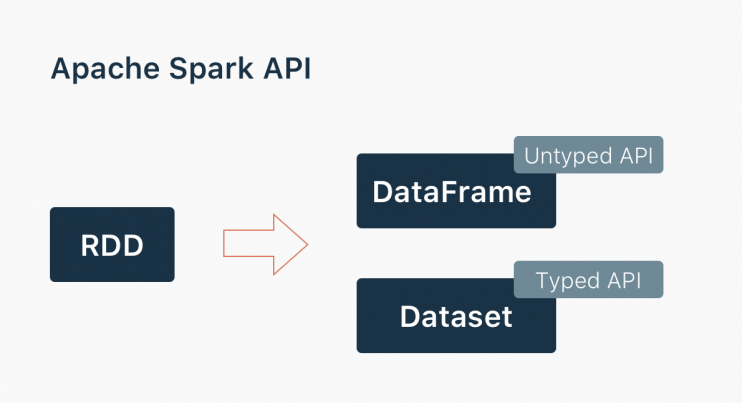

- Spark 2.0에서 RDD, Dataframe은 Dataset에 통합됨 (DataFrame = Dataset[Row])

In [290]:
// 장점

1. Static-typing & runtime type-safety

- 예를 들어 Spark SQL을 사용하면 실행 할 때까지 문법 에러를 알 수 없다. 반면에 Dataframe과 Dataset은 컴파일 시점에 에러를 잡을 수 있다. 
- Dataset API는 람다 함수 및 JVM 타입 객체로 표현되기 때문에, 컴파일 시점에 타입을 검사할 수 있다. 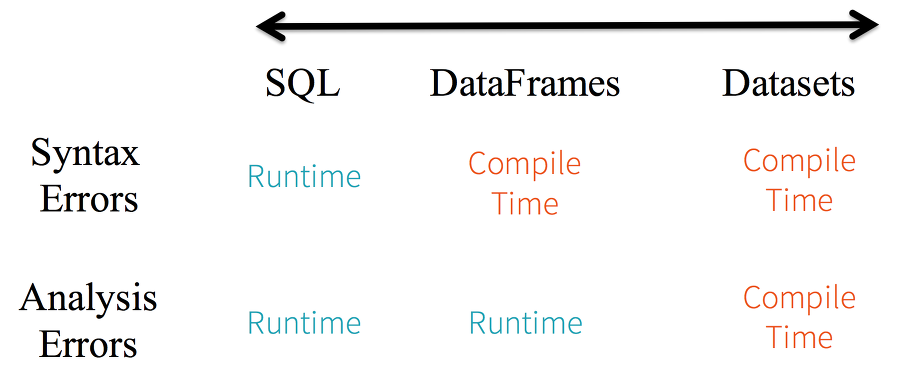

2. High-level abstraction and custom view into structured and semi-structured data
- 구조화된 데이터를 처리할 수 있다. (DataFrame의 특징)
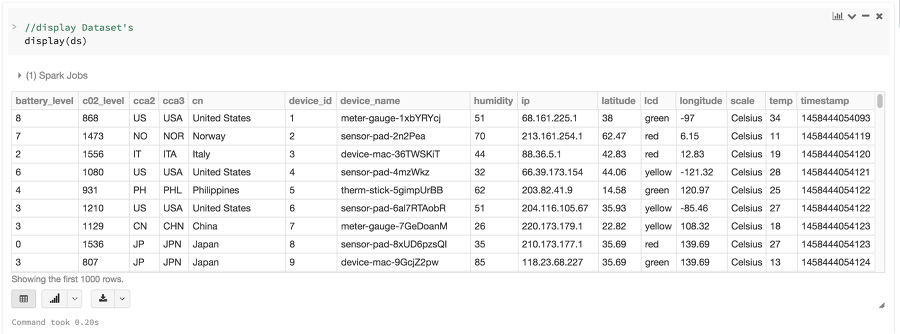

3. Ease-of-use of APIs with structure
- agg, select, sum, avg, map, filter, groupby를 사용하여 데이터를 다루는 것은 RDD의 각 row 필드를 사용하는 것보다 쉽다. 



4. Performance & Optimization
- Dataframe과 Dataset은 Spark SQL 엔진 위에 탑재되어 있다. 
- 최적화된 논리적 및 물리적 쿼리 계획을 생성 할 수 있는 Catalyst를 사용 할 수 있다.

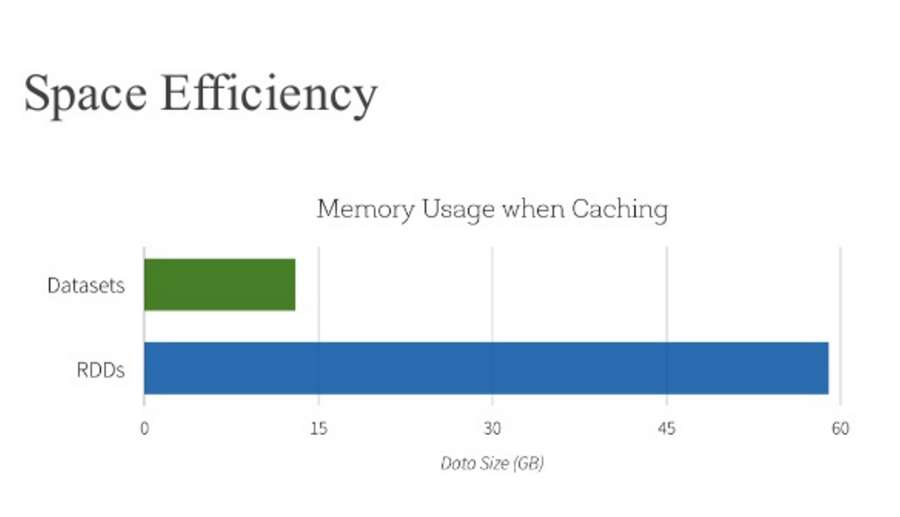




## 5.3 SQL 
- DataFrame을 참조해 SQL 쿼리를 작성
- 스파크가 지원하는 SQL 언어는 스파크 전용 SQL & 하이브 쿼리 언어
- 스파크에서 하이브 기능을 사용하려면 SparkSession을 구성할 때 SparkSession.builder 객체의 enableHiveSupport 메소드를 호출
- EX) val spark = SparkSession.builder().enableHiveSupport().getOrCreate()

In [111]:
val spark = SparkSession.builder().enableHiveSupport().getOrCreate()

spark: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@5139375e


In [112]:
postsDf.createOrReplaceTempView("posts_temp")
// 테이블을 임시로 등록 => 스파크 어플리케이션이 종료되면 같이 사라진다. 
// 이제 SQL 쿼리에서 posts_temp 이름을 참조해 postsDF DataFrame 데이터에 질의를 실행할 수 있다. 

In [114]:
postsDf.write.saveAsTable("posts3")
votesDf.write.saveAsTable("votes3")
// 테이블을 영구적으로 등록 => 스파크 어플리케이션을 재시작해도 계속 유지된다.
// DataFrame의 write 메소드로 등록

### 5.3.1.3 테이블 카탈로그
- 카탈로그 관리 기능은 SparkSession의 catalog 피드로 제공되는 Catalog 클래스로 사용할 수 있다. 

In [116]:
spark.catalog.listTables().show()
// 현재 등록된 테이블 목록 조회
// isTemporary => 영구 테이블 / 임시 테이블 확인
// tableType의 MANAGED => 스파크가 해당 테이블의 데이터까지 관리한다는 것을 의미한다. 

+----------+--------+-----------+---------+-----------+
|      name|database|description|tableType|isTemporary|
+----------+--------+-----------+---------+-----------+
|    posts3| default|       null|  MANAGED|      false|
|    votes3| default|       null|  MANAGED|      false|
|posts_temp|    null|       null|TEMPORARY|       true|
+----------+--------+-----------+---------+-----------+



In [118]:
spark.catalog.listColumns("votes3").show()
// 특정 테이블의 칼럼 정보를 조회

+------------+-----------+---------+--------+-----------+--------+
|        name|description| dataType|nullable|isPartition|isBucket|
+------------+-----------+---------+--------+-----------+--------+
|          id|       null|   bigint|    true|      false|   false|
|      postId|       null|   bigint|    true|      false|   false|
|  voteTypeId|       null|      int|    true|      false|   false|
|creationDate|       null|timestamp|    true|      false|   false|
+------------+-----------+---------+--------+-----------+--------+



In [119]:
spark.catalog.listFunctions.show()
// SQL 함수 목록 조회

+----------+--------+-----------+--------------------+-----------+
|      name|database|description|           className|isTemporary|
+----------+--------+-----------+--------------------+-----------+
|         !|    null|       null|org.apache.spark....|       true|
|         %|    null|       null|org.apache.spark....|       true|
|         &|    null|       null|org.apache.spark....|       true|
|         *|    null|       null|org.apache.spark....|       true|
|         +|    null|       null|org.apache.spark....|       true|
|         -|    null|       null|org.apache.spark....|       true|
|         /|    null|       null|org.apache.spark....|       true|
|         <|    null|       null|org.apache.spark....|       true|
|        <=|    null|       null|org.apache.spark....|       true|
|       <=>|    null|       null|org.apache.spark....|       true|
|         =|    null|       null|org.apache.spark....|       true|
|        ==|    null|       null|org.apache.spark....|       t

### 5.3.2 SQL 쿼리 실행
- DataFrame을 테이블로 등록하고 나면 이제 SQL 표현식을 사용해 이 데이터에 질의를 실행할 수 있다.

In [120]:
val resultDf = sql("select * from posts3")
// 스파크 셸에서 실행
// sql 결과 역시 DataFrame

resultDf: org.apache.spark.sql.DataFrame = [commentCount: int, lastActivityDate: timestamp ... 11 more fields]


In [121]:
resultDf.show(10)

+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|commentCount|    lastActivityDate|ownerUserId|                body|score|        creationDate|viewCount|               title|                tags|answerCount|acceptedAnswerId|postTypeId|  id|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|           4|2013-11-11 18:21:...|         17|&lt;p&gt;The infi...|   23|2013-11-10 19:37:...|     null|                    |                    |       null|            null|         2|1165|
|           5|2013-11-10 20:31:...|         12|&lt;p&gt;Come cre...|    1|2013-11-10 19:44:...|       61|Cosa sapreste dir...| &lt;word-choice&gt;|          1|            null|         1|1166|
|           2|2013-11-10 20:31:...|

In [97]:
spark-sql> select substring(title, 0, 70) from posts3 where postTypeId = 1 order by creationDate desc limit 3;
$ 
// 실패

<console>: 3: error: ';' expected but string literal found.

In [305]:
spark-sql -e "select substring(title, 0, 70) from posts where postTypeId = 1 order by creationDate desc limit 3"

<console>: 2: error: ';' expected but string literal found.

### 5.4 DataFrame 저장 & 불러오기
- write의 필드로 제공되는 DataFrameWriter 객체를 사용해 저장.

In [122]:
val postsDf = itPostsDFStruct


postsDf: org.apache.spark.sql.DataFrame = [commentCount: int, lastActivityDate: timestamp ... 11 more fields]


In [124]:
postsDf.write.saveAsTable("posts_save3")

In [125]:
postsDf.write.format("json").saveAsTable("postsjson3")
// (하이브 메타스토어 등록)

In [127]:
val resultDf2 =sql("select * from postsjson3")

resultDf2: org.apache.spark.sql.DataFrame = [commentCount: int, lastActivityDate: timestamp ... 11 more fields]


In [128]:
resultDf2.show()

+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|commentCount|    lastActivityDate|ownerUserId|                body|score|        creationDate|viewCount|               title|                tags|answerCount|acceptedAnswerId|postTypeId|  id|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+
|           0|2014-03-15 01:52:...|        421|&lt;p&gt;&lt;em&g...|    8|2014-03-15 00:47:...|     null|                    |                    |       null|            null|         2|1816|
|           1|2014-03-15 08:25:...|        497|&lt;p&gt;I used t...|    3|2014-03-15 08:25:...|     null|                    |                    |       null|            null|         2|1817|
|           0|2014-03-15 08:48:...|

In [129]:
// 관계형 데이터베이스에 데이터 저장
/*
val props = new java.util.Properties()
props.setProperty("user", "user")
props.setProperty("password", "password")
postsDf.write.jdbc("jdbc:postgresql://postgresrv/mydb", "posts", props)
*/

In [131]:
// 데이터 불러오기 (하이브 메타스토어)
val postsDf = spark.read.table("posts3")

postsDf: org.apache.spark.sql.DataFrame = [commentCount: int, lastActivityDate: timestamp ... 11 more fields]


In [111]:
// 데이터 불러오기 (관계형 데이터베이스)
// val result = spark.read.jdbc("jdbc:postgresql://postgresrv/mydb", "posts", Array("viewCount > 3"), props)


In [117]:
// sql 메소드로 등록한 데이터 소스에서 데이터 불러오기
/*
sql("CREATE TEMPORARY TABLE postsjdbc "+
  "USING org.apache.spark.sql.jdbc "+
  "OPTIONS ("+
    "url 'jdbc:postgresql://postgresrv/mydb',"+
    "dbtable 'posts',"+
    "user 'user',"+
    "password 'password')")

sql("CREATE TEMPORARY TABLE postsParquet "+
  "USING org.apache.spark.sql.parquet "+
  "OPTIONS (path '/path/to/parquet_file')")
  
val resParq = sql("select * from postsParquet")

*/

### 5.5 카탈리스트 최적화 엔진
- DataFrame DSL과 SQL 표현식을 하위 레벨의 RDD 연산으로 변환한다. 
- RDD의 경우 개발자가 최적화를 해야하지만, Spark SQL에서는 Catalyst Optimizer가 최적화를 대신해준다
- 관계형 데이터베이스 관리 시스템에서의 비용 모델/비용 기반 최적화와 비슷
- 논리적 플랜을 컴파일하고 최적화 &  가장 효과적인 물리적 플랜을 결정하는 비용 옵티마이저를 사용.
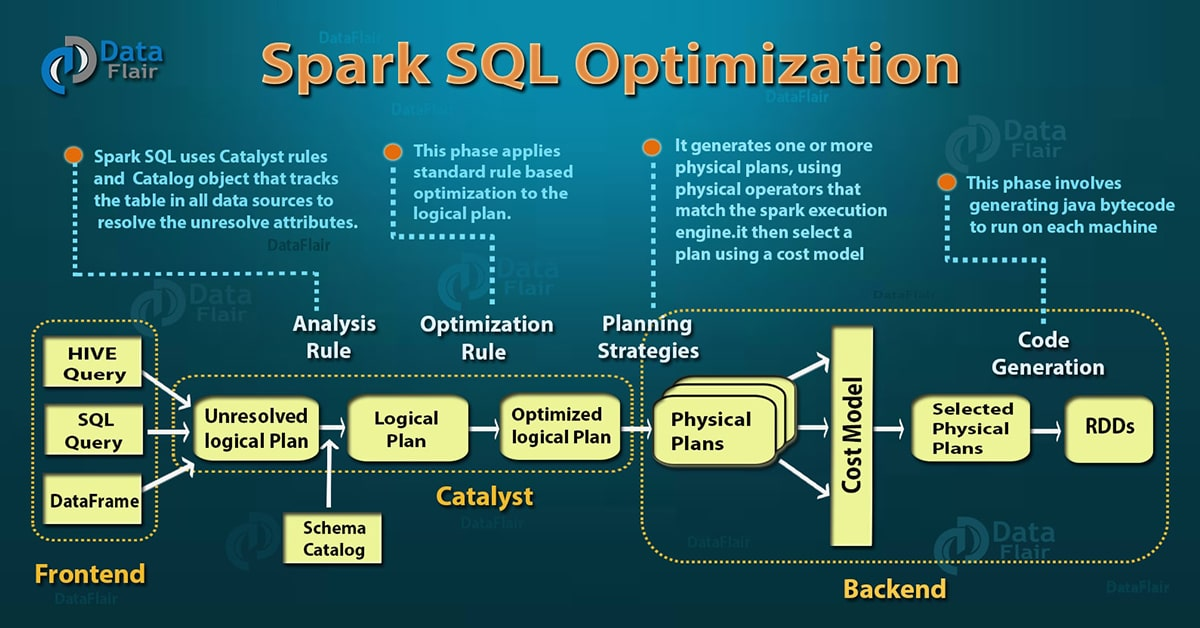

1.Analysis
 * Spark SQL은 Catalyst Rule과 Catalog object(Data source의 모든 Table을 Tracking하는 객체)을 이용하여 이러한 Attribute를 분석한다.
 * 예를 들어 “SELECT col FROM sales” 쿼리에서 col의 타입이 무엇인지, col이라는 컬럼 이름이 Valid한지 sales 테이블을 확인. 


2.Logical Optimizations
 * Logical Optimization 단계에서는 Logical Plan에 Rule 기반 Optimization을 적용한다. 
 * Rule Based Optimization은 Constant Folding, Predicate Pushdown, Projection Pruning, Null Propagation, Boolean Expression Simplification 등의 Rule 들을 적용한다.
 * Constant Folding = 상수 표현식을 Runtime Time에 계산하지 않고 Compile Time에 미리 계산해버리는 방법이다.
 * Predicate Pushdown = 쿼리 밖에 있는 조건절을 쿼리 안쪽으로 넣는 방법이다. 

3.Physical Planning

 * Logical Plan을 |이용해 Cost Based Optimization이나 Spark Operation 관련 Optimization을 진행한다.

4.Code Generation
 * 만들어진 Plan을 각 장비에서 실행시킬 수 있도록 Java Byte Code로 변환한다.

In [132]:
val postsFiltered = postsDf.filter('postTypeId === 1).withColumn("ratio", 'viewCount / 'score).where('ratio < 35)

postsFiltered: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [commentCount: int, lastActivityDate: timestamp ... 12 more fields]


In [133]:
postsFiltered.show(5)

+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+------------------+
|commentCount|    lastActivityDate|ownerUserId|                body|score|        creationDate|viewCount|               title|                tags|answerCount|acceptedAnswerId|postTypeId|  id|             ratio|
+------------+--------------------+-----------+--------------------+-----+--------------------+---------+--------------------+--------------------+-----------+----------------+----------+----+------------------+
|           1|2014-07-25 13:15:...|        154|&lt;p&gt;As part ...|   11|2013-11-10 22:03:...|      187|Ironic constructi...|&lt;english-compa...|          4|            1170|         1|1168|              17.0|
|           9|2014-01-05 11:13:...|         63|&lt;p&gt;When I w...|    5|2013-11-11 10:28:...|      122|Is &quot;scancell...|&lt;usage&gt;&lt;...|     

In [134]:
postsFiltered.explain(true)
// DataFrame의 논리 및 물리 실행 계획 조회

== Parsed Logical Plan ==
'Filter ('ratio < 35)
+- Project [commentCount#3084, lastActivityDate#3085, ownerUserId#3086L, body#3087, score#3088, creationDate#3089, viewCount#3090, title#3091, tags#3092, answerCount#3093, acceptedAnswerId#3094L, postTypeId#3095L, id#3096L, (cast(viewCount#3090 as double) / cast(score#3088 as double)) AS ratio#3307]
   +- Filter (postTypeId#3095L = cast(1 as bigint))
      +- SubqueryAlias spark_catalog.default.posts3
         +- Relation[commentCount#3084,lastActivityDate#3085,ownerUserId#3086L,body#3087,score#3088,creationDate#3089,viewCount#3090,title#3091,tags#3092,answerCount#3093,acceptedAnswerId#3094L,postTypeId#3095L,id#3096L] parquet

== Analyzed Logical Plan ==
commentCount: int, lastActivityDate: timestamp, ownerUserId: bigint, body: string, score: int, creationDate: timestamp, viewCount: int, title: string, tags: string, answerCount: int, acceptedAnswerId: bigint, postTypeId: bigint, id: bigint, ratio: double
Filter (ratio#3307 < cast(35 as do

## 텅스텐 프로젝트
- Spark의 병목 원인은 CPU입니다.
- 그 이유는 데이터를 compress/decompress 하거나 serialize/deserialize 하는 작업이 CPU 자원을 많이 사용하기 때문입니다. 
- 예를 들어 parquet와 같은 압축 포맷을 사용하면 I/O는 줄어 들 수 있지만 데이터를 압축 하거나 풀때 CPU를 많이 사용합니다. 
- 또한, Spark는 JVM을 기반으로 하는 Scala로 개발되어 있어 반드시 Java Object로 변환이 되어야 합니다. 

1. Memory Management and Binary Processing
- 메모리를 좀 더 명시적으로 관리하며 JVM 객체와 Garbage Collection의 Overhead를 없애는 것
- 객체(정수형, 문자열, 튜플 등)를 이진수로 인코딩 & 메모리에서 직접 참조 => 자바 객체보다 훨씬 더 적은 메모리를 차지.
2. Cache-aware computation
- 메모리 계층 구조(L1, L2, Memory, Disk 순으로 느려지니까)를 활용하는 알고리즘과 데이터 구조 도입 ( Alpha Sort 알고리즘)
- http://jimgray.azurewebsites.net/papers/alphasortsigmod.pdf?ranmid=24542&raneaid=tnl5hpstwnw&ransiteid=tnl5hpstwnw-9ahz63vyuylhzcayrznyta&epi=tnl5hpstwnw-9ahz63vyuylhzcayrznyta&irgwc=1&ocid=aid2000142_aff_7593_1243925&tduid=%28ir__efv1xaqksokftnrwkk0sohzxz22xsmbmwp9ezzzc00%29%287593%29%281243925%29%28tnl5hpstwnw-9ahz63vyuylhzcayrznyta%29%28%29&irclickid=_efv1xaqksokftnrwkk0sohzxz22xsmbmwp9ezzzc00
3. Code Generation
- 모던 컴파일러와 CPU를 활용할 수 있는 코드 생성
- DBMS에서 표준처럼 사용하고 있는 Valcano Model에서 더 빠른 방식.
- 굉장히 가볍고 컴파일이 빠른 Janino compiler를 이용해서 JVM byte 코드를 생성 

reference
1. https://medium.com/@leeyh0216/spark-sql-6dc3d645cc31
2. https://younggyuchun.wordpress.com/2017/01/31/spark-%EC%84%B1%EB%8A%A5%EC%9D%98-%ED%95%B5%EC%8B%AC-project-tungsten-%ED%86%BA%EC%95%84%EB%B3%B4%EA%B8%B0/